In [8]:
import sys
import numpy as np
import matplotlib
import pathlib
from matplotlib import pyplot as plt
from pathlib import Path
import os
import skimage

import numpy as np
import tifffile as tiff

# explicit import to PyBaSiC due to not having package support
sys.path.append("./PyBaSiC/")
import pybasic

# Create path and load in images
The directory set up used for this experiment goes as such:
```

├── NF1_SchwannCell_data/
│   ├── 1_preprocessing_data/
│   │   ├── PyBaSiC_Pipelines/
│   │   │   ├── NF1_Channels/
│   │   │   │   ├── DAPI/ or GFP/ or RFP/

```

In [2]:
channel_path = '../PyBaSiC_Pipelines/NF1_Channels/DAPI/'

# The for loop is running through the files within the folder designed by channel_path and will only take the names of the images and strips the ".tif"
# which leaves the image name that helps with identification of cells (genotype)

all_files = os.listdir(channel_path)
file_ext = ".tif"
image_files = []
for file in all_files:
    if file.endswith(file_ext):
        image_files.append(file.strip(file_ext))
image_files.sort()
channel_images = pybasic.tools.load_data(channel_path, '.tif', verbosity = True)

0 / 32
10 / 32
20 / 32
30 / 32


# Run PyBaSiC to calculate the flatfield and darkfield

In [3]:
flatfield, darkfield = pybasic.basic(channel_images, darkfield=True)

reweighting_iter: 1


/home/jenna/NF1_SchwannCell_data/1_preprocessing_data/PyBaSiC_Pipelines/./PyBaSiC/pybasic/tools/inexact_alm_rspca_l1.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  B1_offset = np.minimum(B1_offset, B1_uplimit / np.mean(W_idct_hat))


reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5
reweighting_iter: 6
reweighting_iter: 7
reweighting_iter: 8
reweighting_iter: 9
reweighting_iter: 10


# Displays the flatfield and darkfield that will be applied to the images

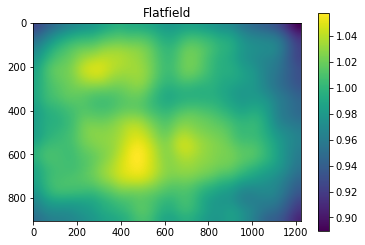

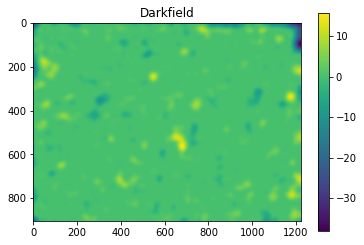

In [4]:
# Based on documentation from the developers, it is recommended to manually check the flatfield function created using the functions below.
# If the flatfield looks smooth, then the correction will be done well.
# If it is noisey, then there is likely an issue with the correction.
# Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5472168/

plt.title('Flatfield')
plt.imshow(flatfield)
plt.colorbar()
plt.show()
plt.title('Darkfield')
plt.imshow(darkfield)
plt.colorbar()
plt.show()

# Run illumination correction

In [5]:
channel_images_corrected = pybasic.correct_illumination(
    images_list = channel_images, 
    flatfield = flatfield, 
    darkfield = darkfield,
)

# Visual comparison of the orginal and corrected images

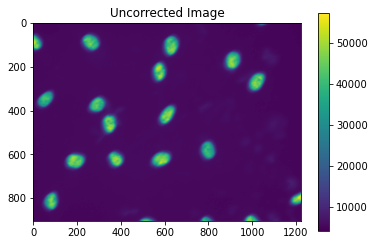

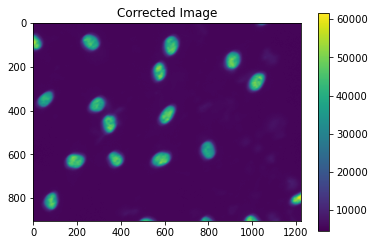

In [6]:
i = 0
plt.title('Uncorrected Image')
plt.imshow(channel_images[i])
plt.colorbar()
plt.show()
plt.title('Corrected Image')
plt.imshow(channel_images_corrected[i])
plt.colorbar()
plt.show()

# Use `for` loop that adds suffix to corrected images and downloads them

In [9]:
# Recommended to save 'image' using '.astype('uint16')' to check to make sure that the images did save correctly but save the images 
# as the float32 that is default as it is stated by developers.

for i, image in enumerate(channel_images_corrected):
    orig_file = image_files[i]
    new_filename = f'../PyBaSiC_Pipelines/NF1_Channels/DAPI_Corrected/{orig_file}_IllumCorrect.tif'
    #skimage.io.imsave(new_filename, image)
    #np.save(new_filename, image)
    tiff.imsave(new_filename, image)